<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day7/Credit_Card_Teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Client Default Prediction

Link to Data set: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Read the description on the site
- Which type of machine learning problem is this?
- What should the output be like?

### 1. Load Libraries and Data
- Find out: How many input features are in the data set?
- How many samples are there?

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

In [0]:
df = pd.read_csv('credit_card.csv', skiprows = 1)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
print(df.columns)
names = df.columns
print(len(names))

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
25


In [0]:
X = df[names[1:-1]].values
print(X.shape)
y = df[names[-1]].values
print(y.shape)




(30000, 23)
(30000,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
print('The number of training samples =', X_train.shape[0] ,'and test samples =', X_test.shape[0])
print('The number of features for each sample =', X_train.shape[1])
print('The number of classes =', max(y_train)+1 )

The number of training samples = 20100 and test samples = 9900
The number of features for each sample = 23
The number of classes = 2


In [0]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_tr_sc = scaler.transform(X_train)
#X_ts_sc = scaler.transform(X_test)

Xtr_mean = np.mean(X_train, axis = 0)
Xtr_std = np.std(X_train, axis = 0)

Xtr_scale = (X_train - Xtr_mean[None,:])/Xtr_std[None,:]
Xts_scale = (X_test - Xtr_mean[None,:])/Xtr_std[None,:]

# Building a Neural Network
### Build a neural network that has:
- 2 hidden layers: 200 neurons in each layer
- Use sigmoid as activation

In [0]:
K.clear_session()

In [0]:
nin = X_train.shape[1]
nout = np.max(y_train)+1
nh = 200

model = Sequential()
model.add(Dense(units = nh, activation = 'sigmoid', input_shape=(nin,), name = 'dense1'))
model.add(Dense(units = 200, activation = 'sigmoid', input_shape=(nh,), name = 'dense2'))
model.add(Dense(1, activation = 'sigmoid', name = 'output'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 200)               4800      
_________________________________________________________________
dense2 (Dense)               (None, 200)               40200     
_________________________________________________________________
output (Dense)               (None, 1)                 201       
Total params: 45,201
Trainable params: 45,201
Non-trainable params: 0
_________________________________________________________________


### Set up the optimizer and compile the model
- What loss funciton do you need to use?

In [0]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(Xtr_scale, y_train,
                   batch_size = 100,
                   epochs = 10,
                   validation_split=0.2)

Train on 20100 samples, validate on 9900 samples
Epoch 1/10
20100/20100 [==============================] - 1s 39us/sample - loss: 0.4812 - acc: 0.7975 - val_loss: 0.4639 - val_acc: 0.8039
Epoch 2/10
20100/20100 [==============================] - 1s 34us/sample - loss: 0.4649 - acc: 0.8089 - val_loss: 0.4598 - val_acc: 0.8061
Epoch 3/10
20100/20100 [==============================] - 1s 35us/sample - loss: 0.4604 - acc: 0.8129 - val_loss: 0.4541 - val_acc: 0.8127
Epoch 4/10
20100/20100 [==============================] - 1s 34us/sample - loss: 0.4546 - acc: 0.8134 - val_loss: 0.4512 - val_acc: 0.8159
Epoch 5/10
20100/20100 [==============================] - 1s 34us/sample - loss: 0.4481 - acc: 0.8154 - val_loss: 0.4435 - val_acc: 0.8151
Epoch 6/10
20100/20100 [==============================] - 1s 35us/sample - loss: 0.4453 - acc: 0.8165 - val_loss: 0.4430 - val_acc: 0.8178
Epoch 7/10
20100/20100 [==============================] - 1s 35us/sample - loss: 0.4448 - acc: 0.8176 - val_loss: 0.4

Text(0, 0.5, 'Test accuracy')

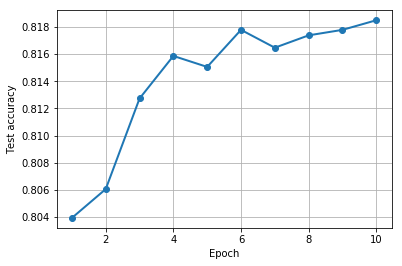

In [0]:
val_accuracy = history.history['val_acc']
nepochs = len(val_accuracy)
plt.plot(np.arange(1,nepochs+1), val_accuracy, 'o-', linewidth=2)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')

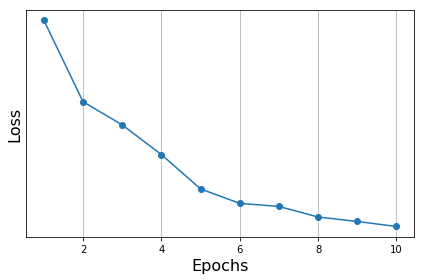

In [0]:
loss = history.history['loss']
nepochs = len(val_accuracy)
plt.semilogy(np.arange(1,nepochs+1), loss, 'o-')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.grid()
plt.tight_layout()

### Evaluate your results: 
- Was the accuracy good? 
- Was there overfitting?

### Think about what you can do to improve:
- Change parameters like learning rate, batch size, number of epochs
- Try different network architecture
- Use a regularizer if there is overfitting. Search online how to do this in Keras

In [0]:
from keras import regularizers

K.clear_session()
model = Sequential()
model.add(Dense(200, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.001), input_shape=(23,) , name = 'dense1'))
model.add(Dense(200, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.001), name = 'dense2'))
model.add(Dense(1, activation = 'sigmoid',kernel_regularizer=regularizers.l1(0.001), name = 'output'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 200)               4800      
_________________________________________________________________
dense2 (Dense)               (None, 200)               40200     
_________________________________________________________________
output (Dense)               (None, 1)                 201       
Total params: 45,201
Trainable params: 45,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.1) 
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(Xtr_scale, y_train,
                   batch_size = 100,
                   epochs = 30,
                   validation_data=(Xts_scale,y_test))

Train on 20100 samples, validate on 9900 samples
Epoch 1/30
20100/20100 [==============================] - 1s 43us/sample - loss: 0.8807 - acc: 0.7786 - val_loss: 0.5583 - val_acc: 0.7995
Epoch 2/30
20100/20100 [==============================] - 1s 36us/sample - loss: 0.5200 - acc: 0.7990 - val_loss: 0.4903 - val_acc: 0.8099
Epoch 3/30
20100/20100 [==============================] - 1s 36us/sample - loss: 0.5033 - acc: 0.8036 - val_loss: 0.4937 - val_acc: 0.8130
Epoch 4/30
20100/20100 [==============================] - 1s 37us/sample - loss: 0.4933 - acc: 0.8071 - val_loss: 0.5012 - val_acc: 0.8008
Epoch 5/30
20100/20100 [==============================] - 1s 36us/sample - loss: 0.4910 - acc: 0.8077 - val_loss: 0.4888 - val_acc: 0.8114
Epoch 6/30
20100/20100 [==============================] - 1s 37us/sample - loss: 0.4873 - acc: 0.8082 - val_loss: 0.4839 - val_acc: 0.8115
Epoch 7/30
20100/20100 [==============================] - 1s 34us/sample - loss: 0.4907 - acc: 0.8090 - val_loss: 0.4

Text(0, 0.5, 'Test accuracy')

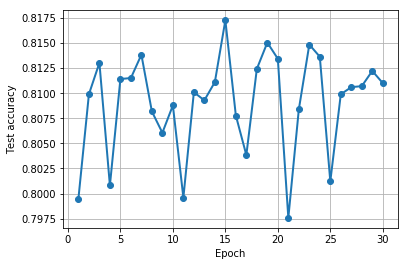

In [0]:
val_accuracy = history.history['val_acc']
nepochs = len(val_accuracy)
plt.plot(np.arange(1,nepochs+1), val_accuracy, 'o-', linewidth=2)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')

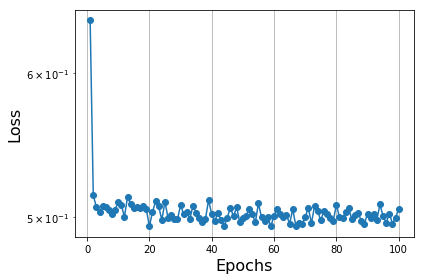

In [0]:
loss = history.history['loss']
plt.semilogy(np.arange(1,101), loss, 'o-')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.grid()
plt.tight_layout()

#### Optimizing the Learning Rate

One challenge in training neural networks is the selection of the learning rate.  Rerun the above code, trying four learning rates as shown in the vector `rates`.  For each learning rate:
* clear the session
* construct the network
* select the optimizer.  Use the Adam optimizer with the appropriate learrning rate.
* train the model for 20 epochs
* save the accuracy and losses

In [0]:
rates = [0.01,0.001,0.0001]
batch_size = 100
loss_hist = []

# TODO
# You can use a for loop for the learning rates
for lr in rates:
  # Clear the session
  K.clear_session()
  
  # Build the model
  model = Sequential()
  model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
  model.add(Dense(nout, activation='softmax', name='output'))
  
  # Select the optimizer with the correct learning rate to test
  opt = optimizers.Adam(lr=lr)
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  # Fit the model
  hist = model.fit(Xtr_scale, ytr, epochs=20, batch_size=batch_size,
                   validation_data=(Xts_scale,yts))
  # Save the loss history
  loss_hist.append( hist.history['loss'])
  # Print the final accuracy
  val_accuracy = hist.history['val_acc'][-1]
  print("lr=%12.4e test accuracy=%f" % (lr, val_accuracy))

Plot the loss funciton vs. the epoch number for all three learning rates on one graph.  You should see that the lower learning rates are more stable, but converge slower.

In [0]:
# TODO
ntest = len(loss_hist)
ntr = Xtr.shape[0]
batch_size=100
for it, loss in enumerate(loss_hist):
  nepochs = len(loss)
  epochs = np.arange(1,nepochs+1)
  plt.semilogy(epochs, loss, 'o-')
  rate_str = ['{0:5.4f}'.format(lr) for lr in rates]
  
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(rate_str,loc='lower left')
plt.grid()